In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/datasets/WELFake_Dataset.csv')

In [ ]:
print(data.shape)

(72134, 4)


In [ ]:
data.head()

Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1

In [ ]:
print(data.isnull().sum())

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64


In [ ]:
data=data.fillna(' ')

In [ ]:
data.head()

Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                      
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Load the stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
# Preprocessing Functions
def preprocess_text(text):
    """Lowercase and remove non-essential characters."""
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Keep only alphanumeric and spaces
    return text

In [ ]:
def tokenize_and_remove_stopwords(text):
    """Tokenize and remove stopwords."""
    sentences = sent_tokenize(text)
    tokens = [word_tokenize(sentence) for sentence in sentences]
    filtered_tokens = [[word for word in token_list if word not in stop_words] for token_list in tokens]
    return filtered_tokens

In [ ]:
def regex_filter(text):
    """Remove numbers, URLs, emails, and phone numbers."""
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    text = re.sub(r'\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}', '', text)  # Remove phone numbers
    return text

In [ ]:
import re
def fin(text):
  text=  re.sub(r'[^\w\s]', ' ',text)
  text = re.sub(r'[ \n]+', ' ', text)
  return text

In [ ]:
def lemmatize_text(tokens):
    """Lemmatize tokens."""
    lemmatized_tokens = [[lemmatizer.lemmatize(word) for word in token_list] for token_list in tokens]
    return lemmatized_tokens

In [ ]:
def full_preprocess_pipeline(text):
    """Complete preprocessing pipeline for a single text."""
    text = preprocess_text(text)  # Lowercase and remove non-essential characters
    text = regex_filter(text)  # Remove numbers, URLs, emails, phone numbers
    text = fin(text)  # Remove special characters and unwanted spaces
    tokens = tokenize_and_remove_stopwords(text)  # Tokenize and remove stopwords
    lemmatized_tokens = lemmatize_text(tokens)  # Lemmatize the tokens
    cleaned_text = ' '.join([' '.join(sentence) for sentence in lemmatized_tokens for word in sentence])
    return cleaned_text

In [ ]:
# # Load DataFrame (Example: replace 'your_data.csv' with your actual file)
# df = pd.read_csv('your_data.csv')

# Apply preprocessing to the 'title' and 'text' columns
# Apply preprocessing to the 'text' column
!pip install nltk
import nltk
nltk.download('punkt_tab')
data['cleaned_text'] = data['text'].apply(full_preprocess_pipeline)
data['cleaned_title'] = data['title'].apply(full_preprocess_pipeline)

# Check if 'Unnamed: 0' column exists before dropping
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# Show the processed dataframe
print(data.head())

# Save the processed dataframe to a new CSV file
data.to_csv('processed_data.csv', index=False)

In [ ]:
processed_data=pd.read_csv('/content/drive/MyDrive/datasets/processed_data.csv')

In [ ]:
print(processed_data.head())

                                               title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                      
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  \
0  No comment is expected from Barack Obama Membe...      1   
1     Did they post their votes for Hillary already?      1   
2   Now, most of the demonstrators gathered last ...      1   
3  A dozen politically active pastors came here f...      0   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1   

                                        cleaned_text  \
0  comment expected barack obama member fyf fukyo...   
1                          post vote hillary already   
2  demonstrator gathered last night exercising co...   
3  dozen politically active pastor came private d...   
4  r

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# # Load your dataset (assuming it has 'text' column)
# df = pd.read_csv('your_data.csv')

# Step 1: Split the dataset into train and test sets (80% train, 20% test)
train_df, test_df = train_test_split(processed_data, test_size=0.2, random_state=42)

print( train_df.head())
print( test_df.head())

# Save the text column from train and test sets to separate text files
train_df['cleaned_text'].to_csv('train_unsupervised.txt', index=False, header=False)
test_df['cleaned_text'].to_csv('test_unsupervised.txt', index=False, header=False)


                                                   title  \
60264  Elon Musk’s Tesla Stock Up $2 Billion Since Jo...   
42050  Wharton Business School Backers Seek Distance ...   
62289  Border Patrol Agents Arrest Smuggler After Rol...   
66421  HILLARY CLINTON CRASHING IN POLLS: Moves To Ob...   
50850  HILLARY’S “OH SH*T” MOMENT: FBI Reveals Emails...   

                                                    text  label  \
60264  Although Tesla CEO Elon Musk shocked Silicon V...      0   
42050  Donald J. Trump often cites his undergraduate ...      0   
62289  Border Patrol agents from the Yuma and El Cent...      0   
66421  So, the working people of America are basicall...      1   
50850  The FBI reportedly has found emails from Hilla...      1   

                                            cleaned_text  \
60264  although tesla ceo elon musk shocked silicon v...   
42050  donald j trump often cite undergraduate degree...   
62289  border patrol agent yuma el centro sector team...

In [ ]:
test=pd.read_csv('/content/test_unsupervised.txt')
train=pd.read_csv('/content/train_unsupervised.txt')


In [ ]:
print(train.head())
print("........")
print(test.head())

  although tesla ceo elon musk shocked silicon valley breaking rank become official member white house manufacturing job initiative value tesla stock billion since election donald trump president dizzying week executive order covering obamacare trade immigration president trump held approval rating percent likely voter according rasmussen report daily presidential tracking poll slightly percent level president obama left office voter welcomed president trump decision scrap partnership tpp deal agree north american free trade agreement nafta mexico canada need reworked although supporter argue free trade make product cheaper u consumer american believe whopping percent percent margin important keep manufacturing job united state keep price low u consumer american strongly believe buying u made good emphasize way nation moving white house announced creation manufacturing job initiative develop best promote job growth get american back work participant include number fortune ceo deputy ch

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296180 sha256=a62f3620b5786eef14558ed590470f2456a12ecf17b94666bbe983171039a535
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [ ]:
!pip install keras tensorflow

In [ ]:
import fasttext

# # Step 2: Train FastText in unsupervised mode on your training data
# # You can adjust parameters like dim (embedding size), minCount (minimum word count), and epoch (number of iterations)
# unsupervised_model = fasttext.train_unsupervised(input='train_unsupervised.txt', model='cbow', dim=100, epoch=5)

# # Save the trained model
# unsupervised_model.save_model('unsupervised_fasttext_model.bin')
ft_model = fasttext.load_model('/content/drive/MyDrive/datasets/unsupervised_fasttext_model.bin')

In [ ]:
import numpy as np

# Step 3: Function to create FastText embeddings for each text
def text_to_fasttext_embeddings(text, ft_model):
    # Check if text is a string before splitting
    if isinstance(text, str):
        words = text.split()
        embeddings = []

        # Get the vector for each word in the text and append it to the list
        for word in words:
            vector = ft_model.get_word_vector(word)
            embeddings.append(vector)

        # Return the mean of all word vectors or a zero vector if no valid words are found
        if embeddings:
            return np.mean(embeddings, axis=0)
        else:
            return np.zeros(ft_model.get_dimension())
    else:
        # Handle non-string values (e.g., float) by returning a zero vector
        return np.zeros(ft_model.get_dimension())

# Step 4: Generate embeddings for the training and testing sets
X_train_fasttext = np.vstack(train_df['cleaned_text'].apply(lambda x: text_to_fasttext_embeddings(x, ft_model)))
X_test_fasttext = np.vstack(test_df['cleaned_text'].apply(lambda x: text_to_fasttext_embeddings(x, ft_model)))

# Save the embeddings for future use
np.save('train_unsupervised_fasttext_embeddings.npy', X_train_fasttext)
np.save('test_unsupervised_fasttext_embeddings.npy', X_test_fasttext)

# Now X_train_fasttext and X_test_fasttext contain the FastText embeddings for each text in your train and test sets

In [ ]:
print(X_test_fasttext[:2])

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000

In [ ]:
import keras
from keras.utils import to_categorical

X_train_fasttext = np.load('/content/drive/MyDrive/datasets/train_unsupervised_fasttext_embeddings.npy')
X_test_fasttext = np.load('/content/drive/MyDrive/datasets/test_unsupervised_fasttext_embeddings.npy')
X_train_reshaped = X_train_fasttext.reshape((X_train_fasttext.shape[0], X_train_fasttext.shape[1], 1))
X_test_reshaped = X_test_fasttext.reshape((X_test_fasttext.shape[0], X_test_fasttext.shape[1], 1))


# Assuming binary classification (for multi-class adjust num_classes)
y_train_encoded = to_categorical(train_df['label'], num_classes=2)
y_test_encoded = to_categorical(test_df['label'], num_classes=2)


In [ ]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer


data = pd.read_csv('/content/drive/MyDrive/datasets/processed_data.csv')
# Prepare dictionary and corpus for LDA
# Each document is a list of terms


data['cleaned_text'] = data['cleaned_text'].astype(str).fillna('')
processed_data1 = [text.split() for text in data['cleaned_text']]  # Example tokenized data


# Create a Gensim dictionary and corpus
dictionary = Dictionary(processed_data1)
corpus = [dictionary.doc2bow(doc) for doc in processed_data1]

# Create LDA model with specified hyperparameters
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=3,               # Number of topics
    random_state=100,           # Random state for reproducibility
    chunksize=100,              # Number of documents to process at a time
    passes=10,                  # Number of passes over the corpus
    alpha='auto',               # LDA's alpha parameter (document-topic density)
    update_every=1              # Update model every 1 chunk
)

# Print the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.019*"said" + 0.012*"u" + 0.010*"state" + 0.007*"government" + 0.006*"united"')
(1, '0.007*"people" + 0.006*"one" + 0.005*"like" + 0.005*"said" + 0.004*"time"')
(2, '0.022*"trump" + 0.012*"said" + 0.008*"clinton" + 0.007*"president" + 0.007*"state"')


In [ ]:


from gensim.models import CoherenceModel

# Calculate coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data1, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score:', coherence_lda)


# Perplexity calculation for LDA model
# (Gensim provides it as a log-perplexity)
perplexity = lda_model.log_perplexity(corpus)
print('\nPerplexity:', perplexity)


Coherence Score: 0.38325287699271277

Perplexity: -8.707848975263323


In [ ]:
# Generate topic distributions for each document
lda_topic_vectors = [lda_model.get_document_topics(bow, minimum_probability=0) for bow in corpus]

# Convert to dense format for model compatibility
lda_topic_vectors = [[prob for _, prob in doc] for doc in lda_topic_vectors]

# Convert to numpy array
lda_topic_vectors = np.array(lda_topic_vectors)


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `data['cleaned_text']` corresponds to your train/test split
lda_topic_vectors_train, lda_topic_vectors_test = train_test_split(
    lda_topic_vectors, test_size=0.2, random_state=42
)


In [ ]:
import numpy as np

# Convert LDA topic vectors to a NumPy array
lda_topic_vectors_train = np.array(lda_topic_vectors_train)
lda_topic_vectors_test = np.array(lda_topic_vectors_test)

# Define input shape for LDA features
input_shape_lda = (lda_topic_vectors_train.shape[1],)


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Concatenate FastText features and LDA topic vectors for training
X_train_combined = np.concatenate([X_train_fasttext, lda_topic_vectors_train], axis=1)
X_test_combined = np.concatenate([X_test_fasttext, lda_topic_vectors_test], axis=1)

# Define and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model with the combined training features and labels
rf_model.fit(X_train_combined, np.argmax(y_train_encoded, axis=1))

# Predict on the test set using the combined features
y_pred_rf = rf_model.predict(X_test_combined)

# Calculate and print the accuracy
accuracy_rf = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")


Random Forest Accuracy: 0.93


Original Text: comment white house refusing deny rumor president obama claimed relocate canada donald trump elected successor november rumor began canadian satire website burred street journal ran fictional story titled obama declares family move canada trump elected story complete fake statement obama read something michelle kid discussed potential solution donald also spoken prime minister justin trudeau outlined canada generous immigration policy wealthy individual well see story immediately picked american newsroom ran headline like obama said he moving trump elected sound good u asked rumor white house press secretary josh earnest would say outright obama considering move canada american people elect trump he working hard make sure nobody leave country result electoral outcome president doesnt support said earnest according mrc blog originated rumor white house decision categorically deny report validity make appear though obama may actually consider moving country trump elected t


Top 20 most important features based on LIME (scaled weights):
Feature: obama, Scaled Weight: -59.33291449042931
Feature: sound, Scaled Weight: 25.48342587301212
Feature: story, Scaled Weight: -25.149880392487418
Feature: white, Scaled Weight: -25.091764235225124
Feature: rumor, Scaled Weight: 23.430352881679603
Feature: canada, Scaled Weight: -19.64322689714395
Feature: something, Scaled Weight: 18.539803675267976
Feature: validity, Scaled Weight: 17.332783885685615
Feature: trump, Scaled Weight: -17.13523666108767
Feature: house, Scaled Weight: -16.61694212190925


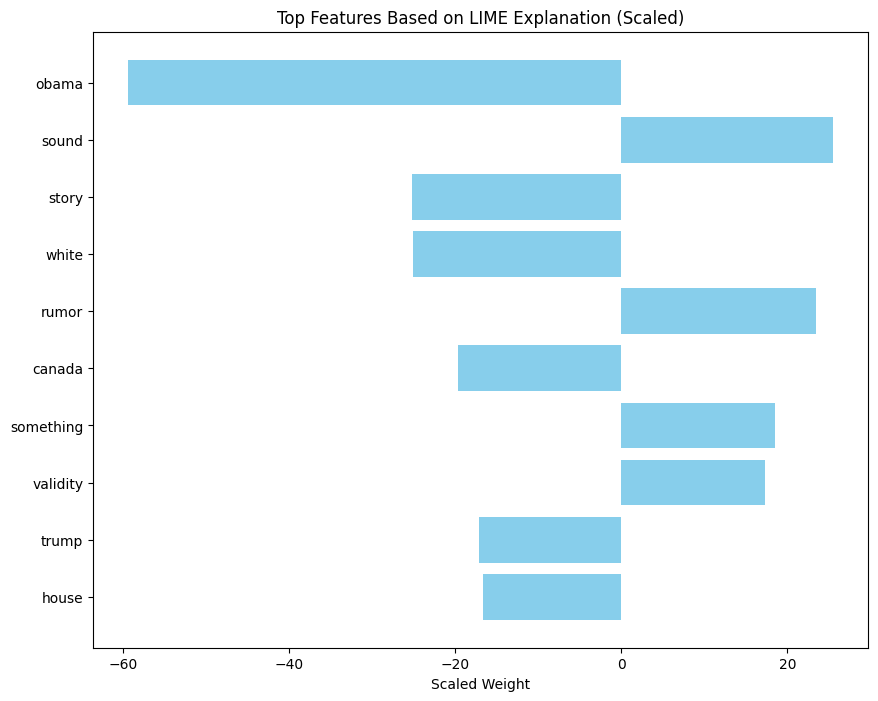

In [ ]:
import numpy as np
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt

# Custom predictor that works with FastText embeddings and LDA topic vectors
class TextPredictor():
    def __init__(self, rf_model, ft_model, lda_model, corpus):  # Add lda_model and corpus
        self.rf_model = rf_model
        self.ft_model = ft_model
        self.lda_model = lda_model  # Store lda_model
        self.corpus = corpus  # Store corpus

    def predict_proba(self, texts):
        # Convert texts to FastText embeddings
        embeddings = np.vstack([self.text_to_fasttext_embeddings(text) for text in texts])

        # Generate LDA topic vectors for the texts
        lda_topic_vectors = [self.lda_model.get_document_topics(self.corpus[0], minimum_probability=0)] * len(texts) # Use pre-trained lda_model and corpus
        lda_topic_vectors = [[prob for _, prob in doc] for doc in lda_topic_vectors]
        lda_topic_vectors = np.array(lda_topic_vectors)

        # Concatenate FastText embeddings and LDA topic vectors
        combined_features = np.concatenate([embeddings, lda_topic_vectors], axis=1)

        probabilities = self.rf_model.predict_proba(combined_features)
        return probabilities

    def text_to_fasttext_embeddings(self, text):
        return self.ft_model.get_sentence_vector(text)

# Create the LIME explainer
explainer = LimeTextExplainer(class_names=['Fake', 'Real'])

# Example from test data
index_to_explain = 9
text_to_explain = test_df['cleaned_text'].iloc[index_to_explain]

# Create the predictor, passing lda_model and corpus
predictor = TextPredictor(rf_model, ft_model, lda_model, corpus)

# Explain the prediction using LIME
exp = explainer.explain_instance(text_to_explain, predictor.predict_proba, num_features=10)

# Display the explanation
print(f"Original Text: {text_to_explain}")
print(f"Predicted Label: {y_pred_rf[index_to_explain]}")

# Show explanation with feature weights
exp.show_in_notebook(text=True)

# Accessing and printing the scaled weights
print("\nTop 20 most important features based on LIME (scaled weights):")
for feature, weight in exp.as_list():
    print(f"Feature: {feature}, Scaled Weight: {weight * 10000}")

# Plotting the scaled weights for better visualization
features, weights = zip(*[(f, w * 10000) for f, w in exp.as_list()])

plt.figure(figsize=(10, 8))
plt.barh(features, weights, color='skyblue')
plt.xlabel('Scaled Weight')
plt.title('Top Features Based on LIME Explanation (Scaled)')
plt.gca().invert_yaxis()  # Invert y-axis to show highest weight at the top
plt.show()


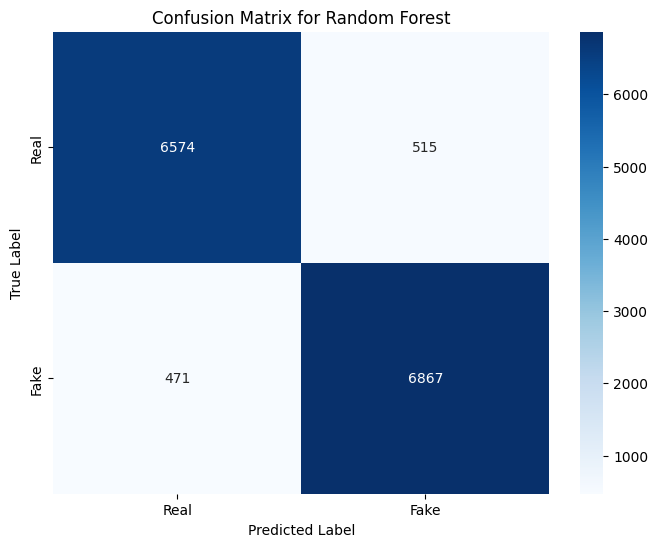

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='linear', random_state=42)  # You can choose different kernels (e.g., 'rbf', 'poly')

svm_model.fit(X_train_fasttext, np.argmax(y_train_encoded, axis=1))

y_pred_svm = svm_model.predict(X_test_fasttext)

accuracy_svm = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

SVM Accuracy: 0.9015041242115478


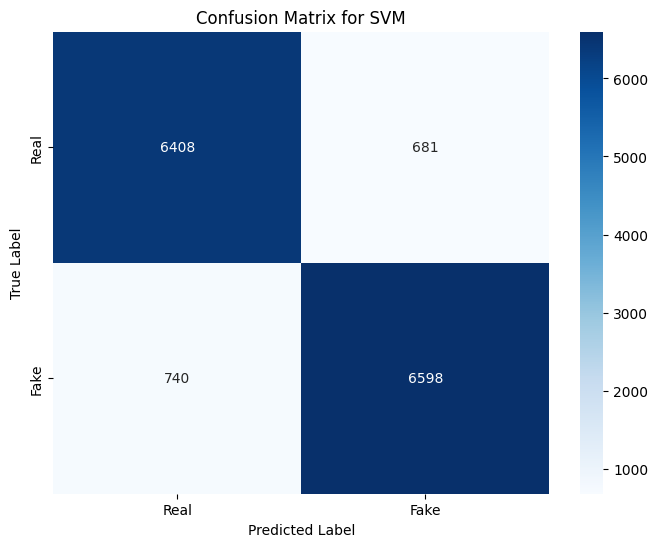

In [ ]:
cm_svm = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()

Decision Tree Accuracy: 0.8637277327233659


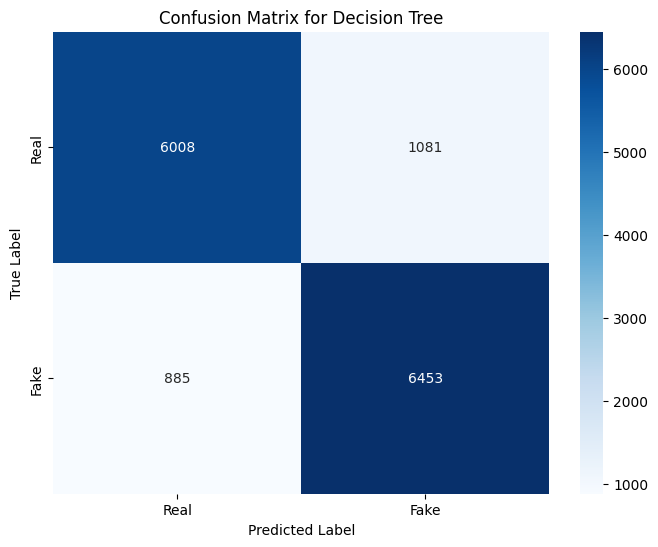

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


dt_model = DecisionTreeClassifier(random_state=42)


dt_model.fit(X_train_fasttext, np.argmax(y_train_encoded, axis=1))

y_pred_dt = dt_model.predict(X_test_fasttext)

accuracy_dt = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")


cm_dt = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_dt)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a logistic regression model
logistic_model = LogisticRegression(max_iter=1000)

# Use GridSearchCV to find the best regularization parameter (C)
grid_search = GridSearchCV(logistic_model, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train_fasttext, np.argmax(y_train_encoded, axis=1))


print("Best C:", grid_search.best_params_['C'])


best_logistic_model = LogisticRegression(C=grid_search.best_params_['C'], max_iter=1000)
best_logistic_model.fit(X_train_fasttext, np.argmax(y_train_encoded, axis=1))


y_pred_logistic = best_logistic_model.predict(X_test_fasttext)
accuracy_logistic = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred_logistic)
print(f"Logistic Regression Accuracy (with Regularization): {accuracy_logistic}")


Best C: 100
Logistic Regression Accuracy (with Regularization): 0.9008802938933943


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score



precision_rf = precision_score(np.argmax(y_test_encoded, axis=1), y_pred_rf)
recall_rf = recall_score(np.argmax(y_test_encoded, axis=1), y_pred_rf)
f1_rf = f1_score(np.argmax(y_test_encoded, axis=1), y_pred_rf)

print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")
print(f"Random Forest F1-score: {f1_rf}")



precision_svm = precision_score(np.argmax(y_test_encoded, axis=1), y_pred_svm)
recall_svm = recall_score(np.argmax(y_test_encoded, axis=1), y_pred_svm)
f1_svm = f1_score(np.argmax(y_test_encoded, axis=1), y_pred_svm)

print(f"SVM Precision: {precision_svm}")
print(f"SVM Recall: {recall_svm}")
print(f"SVM F1-score: {f1_svm}")


precision_dt = precision_score(np.argmax(y_test_encoded, axis=1), y_pred_dt)
recall_dt = recall_score(np.argmax(y_test_encoded, axis=1), y_pred_dt)
f1_dt = f1_score(np.argmax(y_test_encoded, axis=1), y_pred_dt)

print(f"Decision Tree Precision: {precision_dt}")
print(f"Decision Tree Recall: {recall_dt}")
print(f"Decision Tree F1-score: {f1_dt}")



precision_logistic = precision_score(np.argmax(y_test_encoded, axis=1), y_pred_logistic)
recall_logistic = recall_score(np.argmax(y_test_encoded, axis=1), y_pred_logistic)
f1_logistic = f1_score(np.argmax(y_test_encoded, axis=1), y_pred_logistic)

print(f"Logistic Regression Precision: {precision_logistic}")
print(f"Logistic Regression Recall: {recall_logistic}")
print(f"Logistic Regression F1-score: {f1_logistic}")

Random Forest Precision: 0.9302357084800867
Random Forest Recall: 0.9358135731807032
Random Forest F1-score: 0.9330163043478261
SVM Precision: 0.9064431927462564
SVM Recall: 0.899155083128918
SVM F1-score: 0.9027844290894165
Decision Tree Precision: 0.8565171223785506
Decision Tree Recall: 0.8793949304987735
Decision Tree F1-score: 0.8678052716514255
Logistic Regression Precision: 0.9039934354485777
Logistic Regression Recall: 0.9007904061052058
Logistic Regression F1-score: 0.9023890784982935


Ensemble Model Accuracy: 0.9091980314687739
Ensemble Model Precision: 0.9349206349206349
Ensemble Model Recall: 0.8829381302807304
Ensemble Model F1-score: 0.9081861508270255


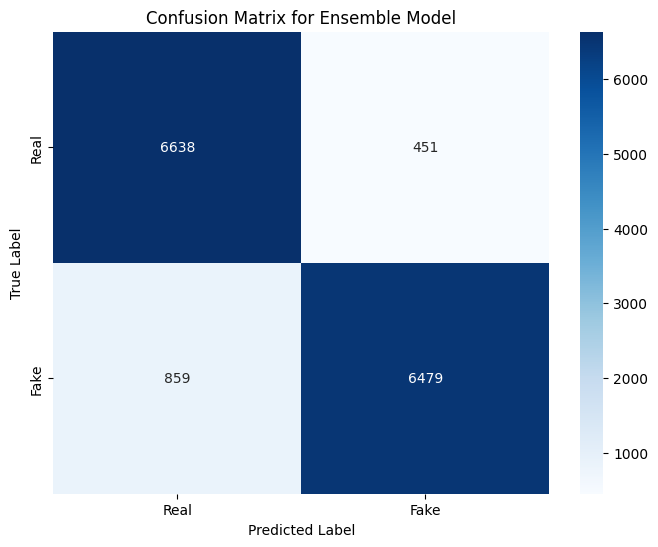

In [ ]:
from sklearn.ensemble import VotingClassifier


ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('svm', svm_model),
    ('dt', dt_model),
    ('logistic', best_logistic_model)
], voting='hard')

ensemble_model.fit(X_train_fasttext, np.argmax(y_train_encoded, axis=1))

y_pred_ensemble = ensemble_model.predict(X_test_fasttext)

accuracy_ensemble = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy_ensemble}")


precision_ensemble = precision_score(np.argmax(y_test_encoded, axis=1), y_pred_ensemble)
recall_ensemble = recall_score(np.argmax(y_test_encoded, axis=1), y_pred_ensemble)
f1_ensemble = f1_score(np.argmax(y_test_encoded, axis=1), y_pred_ensemble)

print(f"Ensemble Model Precision: {precision_ensemble}")
print(f"Ensemble Model Recall: {recall_ensemble}")
print(f"Ensemble Model F1-score: {f1_ensemble}")

cm_ensemble = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_ensemble)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.867747972551466
AdaBoost Precision: 0.875
AdaBoost Recall: 0.8633142545652767
AdaBoost F1-score: 0.8691178488132802


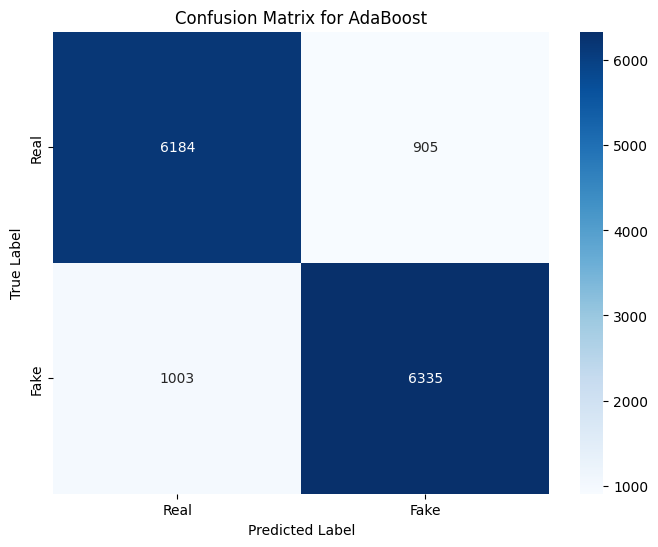

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score # Import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier with a decision tree as the base estimator
ada_boost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the AdaBoost model
ada_boost_model.fit(X_train_fasttext, np.argmax(y_train_encoded, axis=1))

# Make predictions on the test set
y_pred_ada_boost = ada_boost_model.predict(X_test_fasttext)

# Evaluate the AdaBoost model
accuracy_ada_boost = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred_ada_boost)
print(f"AdaBoost Accuracy: {accuracy_ada_boost}")

# Calculate precision, recall, and F1-score
precision_ada_boost = precision_score(np.argmax(y_test_encoded, axis=1), y_pred_ada_boost)
recall_ada_boost = recall_score(np.argmax(y_test_encoded, axis=1), y_pred_ada_boost)
f1_ada_boost = f1_score(np.argmax(y_test_encoded, axis=1), y_pred_ada_boost)

print(f"AdaBoost Precision: {precision_ada_boost}")
print(f"AdaBoost Recall: {recall_ada_boost}")
print(f"AdaBoost F1-score: {f1_ada_boost}")

# Generate and display the confusion matrix
cm_ada_boost = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_ada_boost)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ada_boost, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for AdaBoost')
plt.show()

Original Text: comment white house refusing deny rumor president obama claimed relocate canada donald trump elected successor november rumor began canadian satire website burred street journal ran fictional story titled obama declares family move canada trump elected story complete fake statement obama read something michelle kid discussed potential solution donald also spoken prime minister justin trudeau outlined canada generous immigration policy wealthy individual well see story immediately picked american newsroom ran headline like obama said he moving trump elected sound good u asked rumor white house press secretary josh earnest would say outright obama considering move canada american people elect trump he working hard make sure nobody leave country result electoral outcome president doesnt support said earnest according mrc blog originated rumor white house decision categorically deny report validity make appear though obama may actually consider moving country trump elected t


Top 20 most important features based on LIME (scaled weights):
Feature: obama, Scaled Weight: 0.9538186785921663
Feature: trump, Scaled Weight: 0.9264651984701923
Feature: donald, Scaled Weight: 0.8077578954980857
Feature: elected, Scaled Weight: -0.7828636128033821
Feature: house, Scaled Weight: 0.769492316190482
Feature: u, Scaled Weight: 0.656218020106211
Feature: canada, Scaled Weight: 0.600238564884896
Feature: kid, Scaled Weight: 0.5278434594192434
Feature: moving, Scaled Weight: -0.5115749155477967
Feature: hard, Scaled Weight: 0.4612037706512252


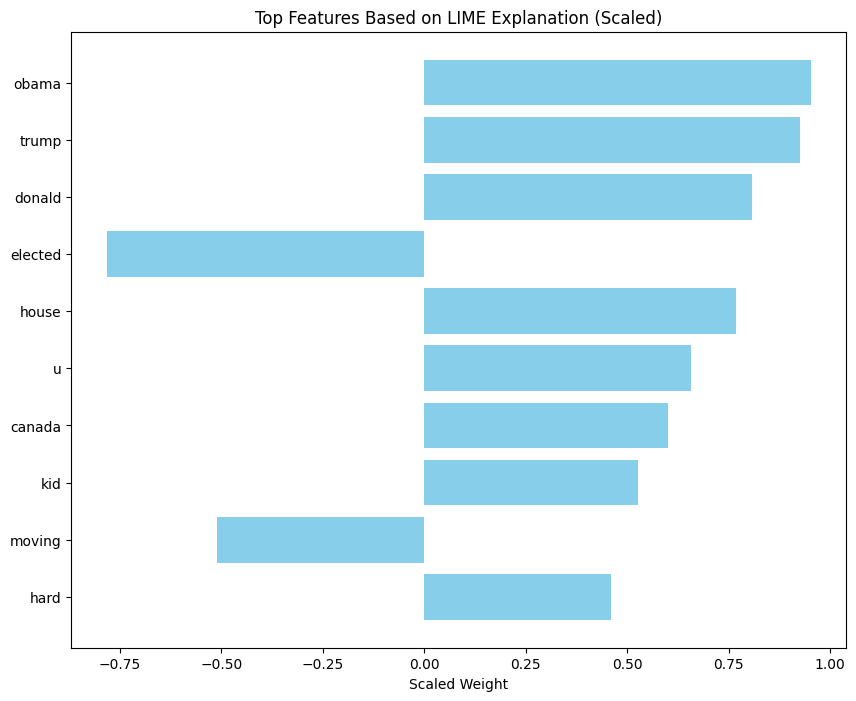

In [ ]:
import numpy as np
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt

# Custom predictor that works with FastText embeddings
class TextPredictor():
    def __init__(self, ada_boost_model, ft_model):
        self.ada_boost_model = ada_boost_model
        self.ft_model = ft_model

    def predict_proba(self, texts):
        # Convert texts to FastText embeddings (representing each text as a vector)
        embeddings = np.vstack([self.text_to_fasttext_embeddings(text) for text in texts])
        probabilities = self.ada_boost_model.predict_proba(embeddings)
        return probabilities

    def text_to_fasttext_embeddings(self, text):
        # Use your FastText model to convert text to embedding
        return self.ft_model.get_sentence_vector(text)

# Create the LIME explainer
explainer = LimeTextExplainer(class_names=['Fake', 'Real'])

# Example from test data
index_to_explain = 9
text_to_explain = test_df['cleaned_text'].iloc[index_to_explain]  # Your text to explain

# Create the predictor
predictor = TextPredictor(ada_boost_model, ft_model)

# Explain the prediction using LIME with scaled weights
exp = explainer.explain_instance(text_to_explain, predictor.predict_proba, num_features=10)

# Display the explanation
print(f"Original Text: {text_to_explain}")
print(f"Predicted Label: {y_pred_ada_boost[index_to_explain]}")

# Show explanation with feature weights
exp.show_in_notebook(text=True)

# Accessing and printing the scaled weights
print("\nTop 20 most important features based on LIME (scaled weights):")
for feature, weight in exp.as_list():
    print(f"Feature: {feature}, Scaled Weight: {weight * 10000}")

# Plotting the scaled weights for better visualization
features, weights = zip(*[(f, w * 10000) for f, w in exp.as_list()])

plt.figure(figsize=(10, 8))
plt.barh(features, weights, color='skyblue')
plt.xlabel('Scaled Weight')
plt.title('Top Features Based on LIME Explanation (Scaled)')
plt.gca().invert_yaxis()  # Invert y-axis to show highest weight at the top
plt.show()
